### Imports

In [2]:
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.pyplot as plt
import sys

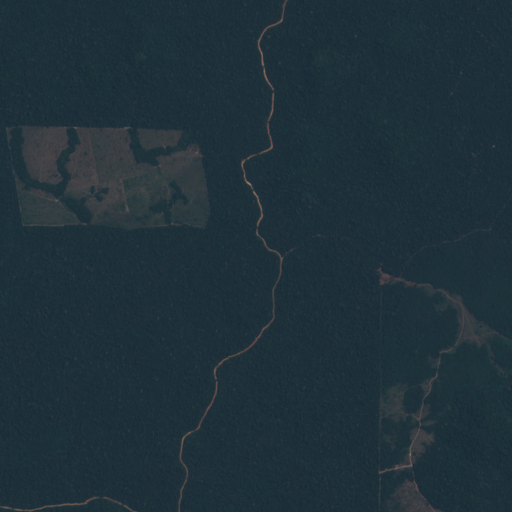

In [3]:
Image.open("./data/training/images/Amazon_1110.tiff_25.tiff")

In [4]:
# load images

## training
training_images_list = os.listdir("./data/training/images/")
training_masks_list = []
training_images = []
for n in training_images_list:
  im = PIL.Image.open(r"./data/training/images/{}".format(n))
  training_images.append(im)
  training_masks_list.append(n[:-5]+'.png')

## trainging masks
training_masks = []
for n in training_masks_list:
  im = PIL.Image.open(r"./data/training/masks/{}".format(n))
  training_masks.append(im)

## validation
validation_images_list = os.listdir("./data/validation/images/")
validation_masks_list = []
validation_images = []
for n in validation_images_list:
  im = PIL.Image.open(r"./data/validation/images/{}".format(n))
  validation_images.append(im)
  validation_masks_list.append(n[:-5]+'.png')

## validation masks
validation_masks = []
for n in validation_masks_list:
  im = PIL.Image.open(r"./data/validation/masks/{}".format(n))
  validation_masks.append(im)

## testing
test_images_list = os.listdir("./data/test/")
test_images = []
for n in test_images_list:
  im = PIL.Image.open(r"./data/test/{}".format(n))
  test_images.append(im)


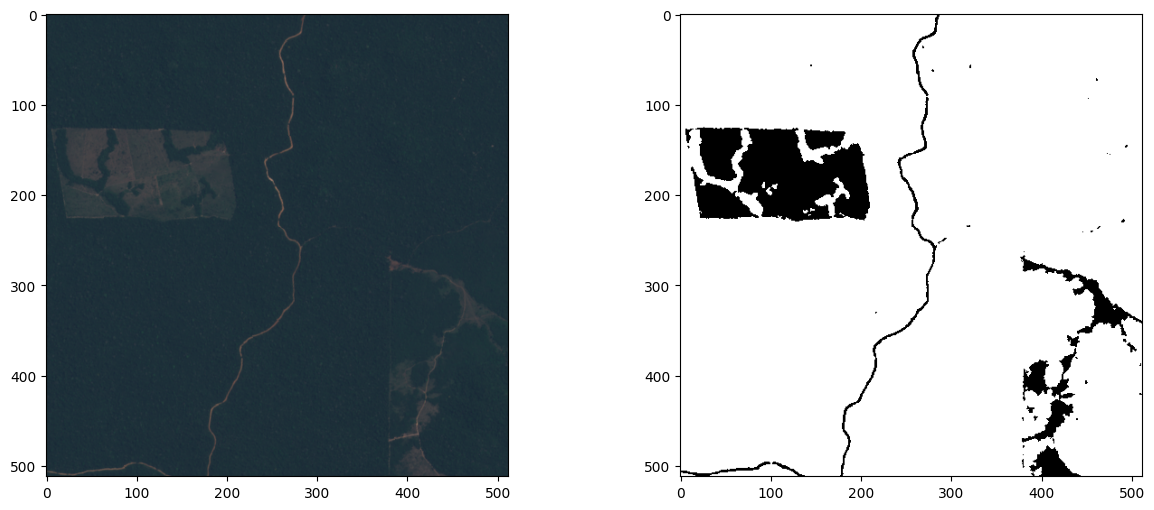

In [5]:
image = training_images[0]
mask = training_masks[0]


fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].imshow(image)
axs[1].imshow(mask, cmap='gray')

In [6]:
forest_rates = []

for train_mask in training_masks:
  mask = np.array(train_mask)
  # print(mask)
  forest_count = np.sum(mask == 1)
  background_count = np.sum(mask == 2)
  forest_percentage = forest_count / (background_count + forest_count)

  forest_rates.append([forest_count, background_count, forest_percentage])

print(forest_rates)

[[239415, 22729, 0.9132957458496094], [241362, 20782, 0.9207229614257812], [69720, 192424, 0.265960693359375], [67234, 194910, 0.25647735595703125], [226996, 35148, 0.8659210205078125], [172511, 89633, 0.6580772399902344], [249522, 12622, 0.9518508911132812], [120749, 141395, 0.4606208801269531], [121084, 141060, 0.4618988037109375], [26923, 236757, 0.10210482402912621], [51027, 211117, 0.19465255737304688], [258969, 3175, 0.9878883361816406], [45285, 216859, 0.17274856567382812], [78563, 183581, 0.2996940612792969], [99676, 162468, 0.3802337646484375], [258871, 3273, 0.9875144958496094], [204962, 57182, 0.7818679809570312], [75848, 186296, 0.289337158203125], [182579, 79565, 0.6964836120605469], [247857, 14287, 0.9454994201660156], [100799, 161345, 0.3845176696777344], [112718, 149426, 0.42998504638671875], [65811, 196333, 0.2510490417480469], [78062, 184082, 0.29778289794921875], [106578, 155566, 0.40656280517578125], [84414, 177730, 0.32201385498046875], [232380, 29764, 0.8864593505

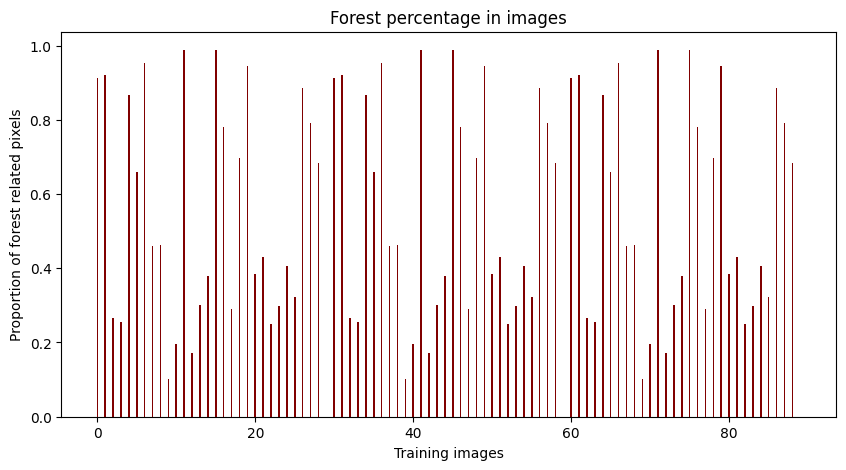

In [7]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar([i for i in range(len(training_masks))], [rate[2] for rate in forest_rates], color ='maroon',
        width = 0.2)
 
plt.ylabel("Proportion of forest related pixels")
plt.xlabel("Training images")
plt.title("Forest percentage in images")
plt.show()